# `sampledbapi` examples

## Import

In [15]:
from sampledbapi import *

## Authenticate

In [16]:
server_address = "https://..."
api_key = "46b6eb84665a7530efafc340edce89013527d379b988edec83b9149a5d810082"
authenticate(server_address, api_key)

## Get list of all objects accessible to the user

In [17]:
objects.getList()

## Get list of files for an object and file content

In [18]:
objects.getFileList(object_id=1)

[{'object_id': 1,
  'file_id': 0,
  'storage': 'local',
  'original_file_name': '1.1534582.pdf'},
 {'object_id': 1, 'file_id': 1, 'storage': 'url', 'url': 'https://heise.de'},
 {'object_id': 1,
  'file_id': 2,
  'storage': 'local',
  'original_file_name': 'test.py'},
 {'object_id': 1,
  'file_id': 3,
  'storage': 'local',
  'original_file_name': 'setup.py'},
 {'object_id': 1,
  'file_id': 4,
  'storage': 'local',
  'original_file_name': 'Hello.txt'}]

In [19]:
objects.getFileInfo(1, 2)

{'object_id': 1,
 'file_id': 2,
 'storage': 'local',
 'original_file_name': 'test.py',
 'base64_content': 'aW1wb3J0IGFyZ3BhcnNlCgpmcm9tIHNhbXBsZWRiYXBpIGltcG9ydCAqCgpwYXJzZXIgPSBhcmdwYXJzZS5Bcmd1bWVudFBhcnNlcigpCnBhcnNlci5hZGRfYXJndW1lbnQoImFkZHJlc3MiLCBoZWxwPSJBZGRyZXNzIG9mIHRoZSBTYW1wbGVEQiBzZXJ2ZXIgdG8gdXNlLiIpCnBhcnNlci5hZGRfYXJndW1lbnQoImFwaV9rZXkiLCBoZWxwPSJBUEkgdG9rZW4uIikKYXJncyA9IHBhcnNlci5wYXJzZV9hcmdzKCkKCmF1dGhlbnRpY2F0ZShhcmdzLmFkZHJlc3MsIGFyZ3MuYXBpX2tleSkKIyBwcmludChvYmplY3RzLmdldExpc3QoKSkKIyBwcmludChvYmplY3RzLmdldCgxMjMpKQpwcmludChpbnN0cnVtZW50cy5nZXRMaXN0KCkpCnByaW50KGluc3RydW1lbnRzLmdldCgxKSkK'}

## Upload a file

In [20]:
import os

fn = "Hello.txt"

with open(fn, "w") as f:
    f.write("Hello world!")
objects.uploadFile(1, fn)
os.remove(fn)

## Advanced search and plotting data from the database

In [21]:
measurements = objects.getList(q="\"Sb\" in material")
measurements

In [22]:
thickness, time, power = [], [], []
for m in measurements:
    thickness.append(m.data["layer_thickness"]["magnitude_in_base_units"])
    time.append(m.data["sputtering_time"]["magnitude_in_base_units"])
    power.append(m.data["sputtering_power"]["magnitude_in_base_units"])

Text(0, 0.5, 'Target thickness / nm')

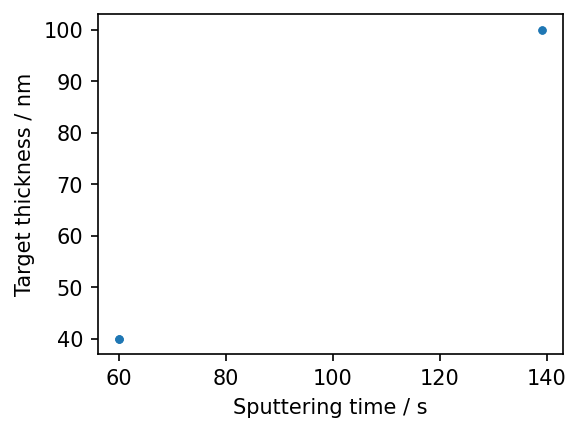

In [23]:
import matplotlib.pyplot as plt
import numpy as np

thickness = np.array(thickness) * 1e9  # in nm
time, power = np.array(time), np.array(power)

plt.figure(figsize=(4, 3), dpi=150)
plt.plot(time, thickness, ".")
plt.xlabel("Sputtering time / s")
plt.ylabel("Target thickness / nm")